# Bar Plot for Wasm vs UniKernel execution time

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import numpy as np
from matplotlib.ticker import MultipleLocator

In [55]:
wasm_df = pd.read_csv('./data/times.csv')
fc_mand_df = pd.read_csv('./data/execution_mand.csv')
fc_image_df = pd.read_csv('./data/execution_image.csv')

# Formatting the data set
wasm_mand_df = wasm_df[wasm_df['func_name'] == 'mandelbrotset_no_io']
wasm_mand_df['exec_time'] = wasm_mand_df['elapsed_load'] + wasm_mand_df['elapsed_exec']
wasm_mand_df = wasm_mand_df[['exec_time']]
wasm_mand_df.index = range(0, len(wasm_mand_df))

wasm_image_df = wasm_df[wasm_df['func_name'] == 'image_processing_no_io']
wasm_image_df['exec_time'] = wasm_image_df['elapsed_load'] + wasm_image_df['elapsed_exec']
wasm_image_df = wasm_image_df[['exec_time']]
wasm_image_df.index = range(0, len(wasm_image_df))

fc_mand_df = fc_mand_df[['elapsed_ms']].rename(columns = {'elapsed_ms': 'exec_time'})
fc_image_df = fc_image_df[['elapsed_ms']].rename(columns = {'elapsed_ms': 'exec_time'})

/tmp/ipykernel_84173/4154715036.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wasm_mand_df['exec_time'] = wasm_mand_df['elapsed_load'] + wasm_mand_df['elapsed_exec']
/tmp/ipykernel_84173/4154715036.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wasm_image_df['exec_time'] = wasm_image_df['elapsed_load'] + wasm_image_df['elapsed_exec']


In [131]:
# Print mean and median
print(f'Mean Wasm Mandelbrot: {wasm_mand_df['exec_time'].mean()}')
print(f'Median Wasm Mandelbrot: {wasm_mand_df['exec_time'].median()}')
print(f'Mean FireCracker Mandelbrot: {fc_mand_df['exec_time'].mean()}')
print(f'Median FireCraker Mandelbrot: {fc_mand_df['exec_time'].median()}')

print(f'Mean Wasm Image: {wasm_image_df['exec_time'].mean()}')
print(f'Median Wasm Image: {wasm_image_df['exec_time'].median()}')
print(f'Mean FireCracker Image: {fc_image_df['exec_time'].mean()}')
print(f'Median FireCraker Image: {fc_image_df['exec_time'].median()}')

Mean Wasm Mandelbrot: 178.739094245
Median Wasm Mandelbrot: 178.23541350000002
Mean FireCracker Mandelbrot: 245.31612699999997
Median FireCraker Mandelbrot: 244.727
Mean Wasm Image: 337.11317252000003
Median Wasm Image: 333.41501
Mean FireCracker Image: 197.52947899999998
Median FireCraker Image: 197.2285


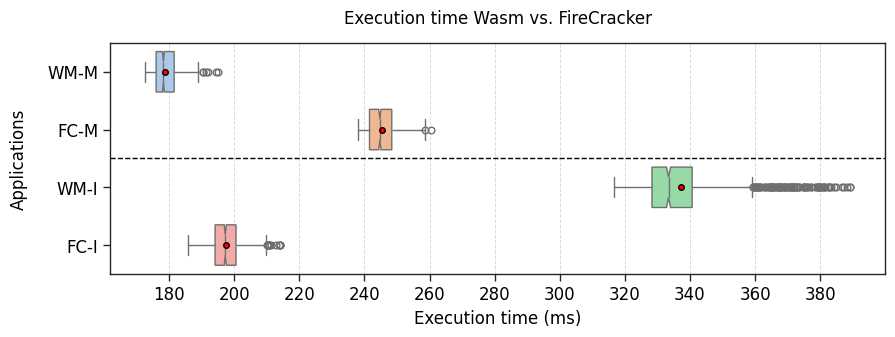

In [140]:
# Groups
#wasm_mand_df['Name'] = 'Wasm Mandelbrot'
#wasm_image_df['Name'] = 'Wasm Image Processing'
#fc_mand_df['Name'] = 'FC Mandelbrot'
#fc_image_df['Name'] = 'FC Image Processing'

wasm_mand_df['Name'] = 'WM-M'
wasm_image_df['Name'] = 'WM-I'
fc_mand_df['Name'] = 'FC-M'
fc_image_df['Name'] = 'FC-I'
df = pd.concat([
    wasm_mand_df,
    fc_mand_df,
    wasm_image_df,
    fc_image_df,
])


# Plot BoxPlot Whisker
sns.set_theme(style='ticks', context='paper')
plt.figure(figsize = (10, 3))
plt.title('Execution time Wasm vs. FireCracker', fontsize=12, pad=14, color='black')
plt.ylabel('Applications', fontsize = 12, color = 'black', labelpad=14)
plt.xlabel('Execution time (ms)', fontsize = 12, color = 'black')
plt.xticks(fontsize=12, color='black')
plt.yticks(fontsize=12, color='black')
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)

#palette = {
#    'WM-M': '#db8449',
#    'FC-M': '#dc89b1',
#    'WM-I': '#a2fff2',
#    'FC-I': '#31ac5c',
#}

ax = sns.boxplot(
    data = df,
    y = 'Name',
    x = 'exec_time',
    width = 0.7,
    notch = True,
    showmeans = True,
    meanprops = 
    {
        'marker':'o',
        'markerfacecolor':'red',
        'markeredgecolor':'black',
        'markersize':'4'
    },
    hue = 'Name',
    palette = 'pastel',
)
#plt.xlim(150, 365)

ax.xaxis.set_major_locator(MultipleLocator(20))
plt.axhline(y=1.5, color='black', linestyle='--', linewidth=1)

plt.savefig('./plots/execution_times.pdf', format = 'pdf', bbox_inches = 'tight')
plt.show()